In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Params
lr = 0.001
batch_size = 1
SAMPLING_NUM = 1000000
COST_THRESHOLD = 6.1e-05

In [2]:
# INIT
params = np.zeros(shape = (3,1))
params[0][0] = 3
params[1][0] = 1
params[2][0] = 2
x_data = np.ones(shape=(SAMPLING_NUM,3)) # 1, x1, x2
y_data = np.zeros(shape = (SAMPLING_NUM, 1)) # y
noise = np.zeros(shape = (SAMPLING_NUM, 1))
noise[:,0] = np.random.normal(0, 1.414, SAMPLING_NUM)
x_data[:,1] = np.random.normal(3, 2, SAMPLING_NUM)
x_data[:,2] = np.random.normal(-1, 2, SAMPLING_NUM)

y_data = np.dot(x_data, params)
y_data = np.add(y_data, noise)

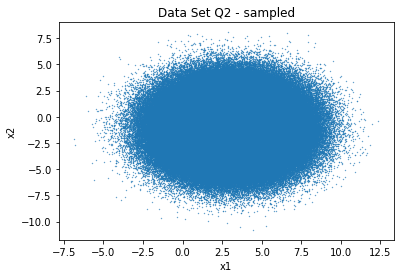

In [3]:
plt.title("Data Set Q2 - sampled") 
plt.xlabel("x1") 
plt.ylabel("x2") 
plt.scatter(x_data[:,1], x_data[:,2], s=0.1)
plt.show()
# print(int(y_data.shape[0]))

In [4]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')
def update_line(hl, new_data):
    xdata, ydata, zdata = hl._verts3d
    hl.set_xdata(list(np.append(xdata, new_data[0])))
    hl.set_ydata(list(np.append(ydata, new_data[1])))
    hl.set_3d_properties(list(np.append(zdata, new_data[2])))
    plt.draw()

In [5]:
def f(x, y):
    return x+4*y

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)


X, Y = np.meshgrid(x, y)
Z = f(X, Y)

In [7]:
# map = plt.figure()
# map_ax = Axes3D(map)
# map_ax.autoscale(enable=True, axis='both', tight=True)

# # # Setting the axes properties
# map_ax.set_xlim3d([0.0, 5.0])
# map_ax.set_ylim3d([0.0, 5.0])
# map_ax.set_zlim3d([0.0, 5.0])
# hl, = map_ax.plot3D([learned_params[1]], [learned_params[2]], [cost(x_data, y_data, learned_params, 0, )])

In [8]:
def cost(x_data, y_data, params, ll, ul):
    sum = 0
    for i in range(ll, ul):
        sum = sum + ((1/(ul-ll+1))*(y_data[i]-np.dot(params, x_data[i]))**2)/2
    return sum

In [14]:
from os import system
import os
from IPython.display import clear_output
def sgd_main(x_data, y_data):
    m = int(y_data.shape[0])
    r = batch_size
    theta = np.zeros(shape = (1, 3))
    epoch = 0
    ll = 0
    ul = r
    prevcost=0

    map = plt.figure()
    map_ax = Axes3D(map)
    map_ax.autoscale(enable=True, axis='both', tight=True)
    # # Setting the axes properties
    map_ax.set_xlim3d([0.0, 5.0])
    map_ax.set_ylim3d([0.0, 5.0])
    map_ax.set_zlim3d([0.0, 5.0])
    hl, = map_ax.plot3D([theta[0][0]], [theta[0][1]], [theta[0][2]])

    while(abs(prevcost - cost(x_data, y_data, theta, 0, m))>COST_THRESHOLD):
        p = 0
        ll=0
        ul=r
        
        while(p <= m):    
            # p-th batch

            update_line(hl, (theta[0][0], theta[0][1], theta[0][2]))
            plt.show(block=False)
            plt.pause(0.2)
            
            prevcost = cost(x_data, y_data, theta, ll, ul)
            clear_output(wait=True)
#             os.system('clear')
            print('=================EPOCH %s=================' % epoch)
            for i in range(p, r+p):
                gradient = np.zeros(3)
                for j in range(3):
                    gradient[j] += ((y_data[i] - np.dot(theta, x_data[i])) * x_data[i][j])/r
                    theta[0][j] += lr * gradient[j]
            print('Batch %s out of %s batches\n' % (p/r, m/r))
            print(theta[0])
            p += r
            if(p == m):
                break
            now_cost = cost(x_data, y_data, theta, ll, ul)
            print('COST NOW: %s \n' % now_cost)
            print('COST DiFF: %s \n' % (prevcost-now_cost))
            # if(prevcost - cost(x_data, y_data, theta, ll, ul)<COST_THRESHOLD and cost(x_data, y_data, theta, ll, ul)<COST_THRESHOLD*10):
            #     return theta
            # prevcost = cost(x_data, y_data, theta, ll, ul)
            ll += r
            ul += r
        epoch+=1
        # break
    return theta

In [15]:
learned_params = sgd_main(x_data, y_data)

=================EPOCH 0=================
Batch 84.0 out of 1000000.0 batches

[0.17322251 0.73674171 0.3531591 ]
COST NOW: [16.90255476] 

COST DiFF: [0.63846128] 



<Figure size 432x288 with 0 Axes>

KeyboardInterrupt: 

In [7]:
# Unit Test
# learned_params = np.zeros(shape = (4, 3))
# for i in range(4):
#     batch_size = (100**i)
#     learned_params[i] = sgd_main(x_data, y_data)
#     print('Learned Params with batch_size = %s : theta = %s \n' % (batch_size,str(learned_params[i])))
#     print('COST: %s \n' % cost(x_data, y_data, learned_params[i], 0, int(y_data.shape[0])))
#     break

# Report

In [8]:
TESTING_SIZE = 10000
testing_x = np.ones(shape = (TESTING_SIZE, 3))
testing_y = np.ones(shape = (TESTING_SIZE, 1))
print(testing_x[:,0])
print(testing_y[:,0])

[1. 1. 1. ... 1. 1. 1.]
[1. 1. 1. ... 1. 1. 1.]


In [9]:
f = open('./q2/q2test.csv','r')
cnt = 0
for x in f:
    lt = x.split(',')
    testing_x[cnt][0] = 1
    testing_x[cnt][1] = lt[0]
    testing_x[cnt][2] = lt[1]
    testing_y[cnt][0] = lt[2]
    cnt += 1

In [10]:
print(testing_y.shape)
print(testing_x.shape)

(10000, 1)
(10000, 3)


In [11]:
print(cost(testing_x, testing_y, learned_params,0, TESTING_SIZE))

[1.07833971]
